<a href="https://colab.research.google.com/github/subin-park46/project1/blob/master/baseball_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.4 MB/s eta 0:00:00


In [3]:
from pybaseball import statcast

data = statcast(start_dt = '2025-03-30', end_dt = '2025-10-31')
data.head()

This is a large query, it may take a moment to complete


/usr/local/lib/python3.12/dist-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|          | 0/216 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_co

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,...,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
265,SI,2025-10-31,95.6,-1.5,5.93,"Glasnow, Tyler",665926,607192,double_play,hit_into_play,<NA>,<NA>,<NA>,<NA>,13,"Blue Jays challenged (force play), call on the...",W,L,R,TOR,LAD,X,7,line_drive,1,0,2025,-1.1,1.1,-0.84,2.29,664702,680718,<NA>,1,9,Bot,91.69,113.56,<NA>,...,3,1,3,3,1,1,3,Standard,Standard,195,-0.298,-0.226,74.7,7.1,0.792,0.226,88.0,-2,-2,0.298362,0.298362,31,26,32,27,1,3,4,2,1,1,1.42,1.1,-1.1,52.3,6.58076,10.854668,28.664188,47.433798,26.421737
273,CU,2025-10-31,80.7,-1.51,6.17,"Glasnow, Tyler",665926,607192,NaN,ball,<NA>,<NA>,<NA>,<NA>,11,Ball,W,L,R,TOR,LAD,B,<NA>,NaN,0,0,2025,0.66,-1.24,-0.26,4.59,664702,680718,<NA>,1,9,Bot,<NA>,<NA>,<NA>,...,3,1,3,3,1,1,3,Standard,Standard,23,-0.014,0.03,<NA>,<NA>,<NA>,-0.03,<NA>,-2,-2,0.298362,0.298362,31,26,32,27,1,3,4,2,1,1,4.79,-0.66,0.66,58.6,<NA>,<NA>,<NA>,<NA>,<NA>
288,SI,2025-10-31,96.0,-1.5,6.03,"Glasnow, Tyler",676391,607192,field_out,hit_into_play,<NA>,<NA>,<NA>,<NA>,11,Ernie Clement pops out to first baseman Freddi...,W,R,R,TOR,LAD,X,3,popup,0,0,2025,-1.09,1.24,-0.84,3.52,664702,680718,<NA>,0,9,Bot,145.27,169.52,<NA>,...,3,1,3,3,1,1,3,Standard,Standard,193,-0.158,-0.207,59.5,5.6,0.023,0.207,88.0,-2,-2,0.441843,0.441843,31,29,32,29,1,3,4,2,1,1,1.25,1.09,1.09,54.1,3.395752,7.223792,25.850234,25.424445,23.649587
124,FF,2025-10-31,98.9,-2.17,6.05,"Sasaki, Roki",680718,808963,double,hit_into_play,<NA>,<NA>,<NA>,<NA>,1,"Blue Jays challenged (grounds rule), call on t...",W,L,R,TOR,LAD,X,<NA>,line_drive,2,2,2025,-0.83,1.26,-0.28,3.38,<NA>,<NA>,664702,0,9,Bot,89.67,47.22,<NA>,...,3,1,3,3,1,1,3,Strategic,Standard,220,0.239,0.773,72.8,6.4,1.128,-0.773,105.5,-2,-2,0.191652,0.191652,23,25,24,26,1,3,4,2,<NA>,1,1.08,0.83,-0.83,44.1,3.294031,15.531223,20.930269,38.639217,26.632038
126,FS,2025-10-31,86.6,-2.06,6.1,"Sasaki, Roki",680718,808963,NaN,ball,<NA>,<NA>,<NA>,<NA>,13,Ball,W,L,R,TOR,LAD,B,<NA>,NaN,1,2,2025,-0.11,-0.18,-1.02,2.53,<NA>,<NA>,664702,0,9,Bot,<NA>,<NA>,<NA>,...,3,1,3,3,1,1,3,Strategic,Standard,297,-0.015,0.036,<NA>,<NA>,<NA>,-0.036,<NA>,-2,-2,0.191652,0.191652,23,25,24,26,1,3,4,2,<NA>,1,3.21,0.11,-0.11,49.8,<NA>,<NA>,<NA>,<NA>,<NA>


In [5]:
data_ohtani = data[data['player_name'] == 'Ohtani, Shohei']
data_ohtani.to_csv('2025_Ohtani.csv')
data_ohtani.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,...,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,FF,2025-10-28,96.3,-2.06,5.67,"Ohtani, Shohei",676391,660271,double,hit_into_play,<NA>,<NA>,<NA>,<NA>,7,Ernie Clement doubles (4) on a sharp line driv...,W,R,R,LAD,TOR,X,8,line_drive,1,0,2025,-0.77,1.36,-0.46,1.94,<NA>,<NA>,662139,0,7,Top,82.01,52.44,<NA>,...,2,2,1,2,1,2,1,Standard,Standard,219,-0.114,0.692,<NA>,<NA>,1.088,-0.692,101.7,-1,1,0.270197,0.729803,30,29,31,29,3,2,11,1,4,1,1.11,0.77,0.77,36.1,<NA>,<NA>,<NA>,<NA>,<NA>
1,CU,2025-10-28,75.1,-1.79,6.13,"Ohtani, Shohei",676391,660271,NaN,ball,<NA>,<NA>,<NA>,<NA>,13,Ball,W,R,R,LAD,TOR,B,<NA>,NaN,0,0,2025,0.9,-1.24,-1.18,1.9,<NA>,<NA>,662139,0,7,Top,<NA>,<NA>,<NA>,...,2,2,1,2,1,2,1,Standard,Standard,41,-0.007,0.04,<NA>,<NA>,<NA>,-0.04,<NA>,-1,1,0.270197,0.729803,30,29,31,29,3,2,11,1,4,1,5.33,-0.9,-0.9,43.0,<NA>,<NA>,<NA>,<NA>,<NA>
2,FF,2025-10-28,97.3,-2.33,5.64,"Ohtani, Shohei",662139,660271,single,hit_into_play,<NA>,<NA>,<NA>,<NA>,6,Daulton Varsho singles on a line drive to righ...,W,L,R,LAD,TOR,X,9,line_drive,0,0,2025,-0.69,1.24,0.4,2.78,<NA>,<NA>,<NA>,0,7,Top,183.66,122.3,<NA>,...,2,2,1,2,1,2,1,Standard,Standard,215,-0.045,0.438,78.4,7.6,0.988,-0.438,88.0,-1,1,0.307793,0.692207,30,28,31,29,3,2,11,1,4,1,1.18,0.69,-0.69,33.1,9.511846,-3.945714,29.672946,29.827708,25.316385
3,ST,2025-10-28,85.7,-2.47,5.42,"Ohtani, Shohei",672386,660271,strikeout,foul_tip,<NA>,<NA>,<NA>,<NA>,9,Alejandro Kirk strikes out on a foul tip.,W,R,R,LAD,TOR,S,2,NaN,2,2,2025,1.11,-0.12,0.58,1.72,<NA>,<NA>,<NA>,2,6,Top,<NA>,<NA>,<NA>,...,2,2,1,2,1,2,1,Standard,Standard,62,0.003,-0.224,76.4,7.6,<NA>,0.224,<NA>,-1,1,0.383533,0.616467,30,26,31,27,3,2,11,1,4,1,3.26,-1.11,-1.11,29.6,8.684293,0.907794,23.571889,44.781028,27.830555
4,FF,2025-10-28,95.8,-2.18,5.62,"Ohtani, Shohei",672386,660271,NaN,foul,<NA>,<NA>,<NA>,<NA>,11,Foul,W,R,R,LAD,TOR,S,<NA>,NaN,2,1,2025,-0.32,1.24,-0.04,3.79,<NA>,<NA>,<NA>,2,6,Top,<NA>,<NA>,<NA>,...,2,2,1,2,1,2,1,Standard,Standard,220,-0.009,-0.073,66.9,6.8,<NA>,0.073,88.0,-1,1,0.383533,0.616467,30,26,31,27,3,2,11,1,4,1,1.24,0.32,0.32,31.5,11.110452,2.08757,11.835127,36.633617,30.831513


In [10]:
pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.1 MB/s eta 0:00:00


In [11]:
import koreanize_matplotlib # 도표 내 한글 사용 가능
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('2025_Ohtani.csv')
df

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,...,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,0,FF,2025-10-28,96.3,-2.06,5.67,"Ohtani, Shohei",676391,660271,double,hit_into_play,NaN,NaN,NaN,NaN,7,Ernie Clement doubles (4) on a sharp line driv...,W,R,R,LAD,TOR,X,8.0,line_drive,1,0,2025,-0.77,1.36,-0.46,1.94,NaN,NaN,662139.0,0,7,Top,82.01,52.44,...,2,2,1,2,1,2,1,Standard,Standard,219,-0.114,0.692,NaN,NaN,1.088,-0.692,101.7,-1,1,0.270197,0.729803,30,29,31,29,3,2,11.0,1,4,1.0,1.11,0.77,0.77,36.1,NaN,NaN,NaN,NaN,NaN
1,1,CU,2025-10-28,75.1,-1.79,6.13,"Ohtani, Shohei",676391,660271,NaN,ball,NaN,NaN,NaN,NaN,13,Ball,W,R,R,LAD,TOR,B,NaN,NaN,0,0,2025,0.90,-1.24,-1.18,1.90,NaN,NaN,662139.0,0,7,Top,NaN,NaN,...,2,2,1,2,1,2,1,Standard,Standard,41,-0.007,0.040,NaN,NaN,NaN,-0.040,NaN,-1,1,0.270197,0.729803,30,29,31,29,3,2,11.0,1,4,1.0,5.33,-0.90,-0.90,43.0,NaN,NaN,NaN,NaN,NaN
2,2,FF,2025-10-28,97.3,-2.33,5.64,"Ohtani, Shohei",662139,660271,single,hit_into_play,NaN,NaN,NaN,NaN,6,Daulton Varsho singles on a line drive to righ...,W,L,R,LAD,TOR,X,9.0,line_drive,0,0,2025,-0.69,1.24,0.40,2.78,NaN,NaN,NaN,0,7,Top,183.66,122.30,...,2,2,1,2,1,2,1,Standard,Standard,215,-0.045,0.438,78.4,7.6,0.988,-0.438,88.0,-1,1,0.307793,0.692207,30,28,31,29,3,2,11.0,1,4,1.0,1.18,0.69,-0.69,33.1,9.511846,-3.945714,29.672946,29.827708,25.316385
3,3,ST,2025-10-28,85.7,-2.47,5.42,"Ohtani, Shohei",672386,660271,strikeout,foul_tip,NaN,NaN,NaN,NaN,9,Alejandro Kirk strikes out on a foul tip.,W,R,R,LAD,TOR,S,2.0,NaN,2,2,2025,1.11,-0.12,0.58,1.72,NaN,NaN,NaN,2,6,Top,NaN,NaN,...,2,2,1,2,1,2,1,Standard,Standard,62,0.003,-0.224,76.4,7.6,NaN,0.224,NaN,-1,1,0.383533,0.616467,30,26,31,27,3,2,11.0,1,4,1.0,3.26,-1.11,-1.11,29.6,8.684293,0.907794,23.571889,44.781028,27.830555
4,4,FF,2025-10-28,95.8,-2.18,5.62,"Ohtani, Shohei",672386,660271,NaN,foul,NaN,NaN,NaN,NaN,11,Foul,W,R,R,LAD,TOR,S,NaN,NaN,2,1,2025,-0.32,1.24,-0.04,3.79,NaN,NaN,NaN,2,6,Top,NaN,NaN,...,2,2,1,2,1,2,1,Standard,Standard,220,-0.009,-0.073,66.9,6.8,NaN,0.073,88.0,-1,1,0.383533,0.616467,30,26,31,27,3,2,11.0,1,4,1.0,1.24,0.32,0.32,31.5,11.110452,2.087570,11.835127,36.633617,30.831513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1718,FF,2025-06-16,98.3,-2.43,5.50,"Ohtani, Shohei",665487,660271,NaN,swinging_strike,NaN,NaN,NaN,NaN,5,Swinging Strike,R,R,R,LAD,SD,S,NaN,NaN,3,1,2025,-0.18,1.10,0.22,2.77,NaN,NaN,NaN,0,1,Top,NaN,NaN,...,0,0,0,0,0,0,0,Standard,Standard,219,0.000,-0.094,77.2,7.6,NaN,0.094,NaN,0,0,0.500000,0.500000,30,26,31,26,1,0,NaN,1,6,1.0,1.24,0.18,0.18,33.6,14.915790,-0.109725,32.522210,39.607261,24.749657
1031,1772,SI,2025-06-16,98.5,-2.43,5.43,"Ohtani, Shohei",665487,660271,NaN,ball,NaN,NaN,NaN,NaN,14,Bal

### 오타니 구종별 비율 - pie

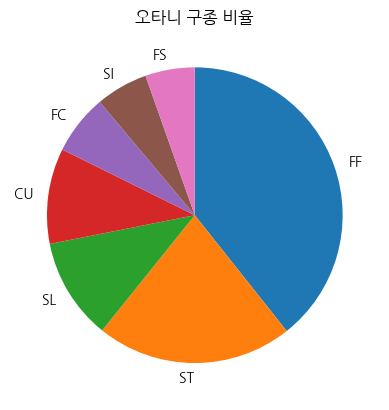

In [16]:
counts = df['pitch_type'].value_counts()
plt.pie(counts, labels=counts.index, counterclock=False, startangle=90)

# 제목 추가
plt.title('오타니 구종 비율')
plt.show()

### 오타니 구속별 막대그래프

In [31]:
df['speed_km'] = df['release_speed'] * 1.61
df

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,...,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,speed_km
0,0,FF,2025-10-28,96.3,-2.06,5.67,"Ohtani, Shohei",676391,660271,double,hit_into_play,NaN,NaN,NaN,NaN,7,Ernie Clement doubles (4) on a sharp line driv...,W,R,R,LAD,TOR,X,8.0,line_drive,1,0,2025,-0.77,1.36,-0.46,1.94,NaN,NaN,662139.0,0,7,Top,82.01,52.44,...,2,1,2,1,2,1,Standard,Standard,219,-0.114,0.692,NaN,NaN,1.088,-0.692,101.7,-1,1,0.270197,0.729803,30,29,31,29,3,2,11.0,1,4,1.0,1.11,0.77,0.77,36.1,NaN,NaN,NaN,NaN,NaN,155.043
1,1,CU,2025-10-28,75.1,-1.79,6.13,"Ohtani, Shohei",676391,660271,NaN,ball,NaN,NaN,NaN,NaN,13,Ball,W,R,R,LAD,TOR,B,NaN,NaN,0,0,2025,0.90,-1.24,-1.18,1.90,NaN,NaN,662139.0,0,7,Top,NaN,NaN,...,2,1,2,1,2,1,Standard,Standard,41,-0.007,0.040,NaN,NaN,NaN,-0.040,NaN,-1,1,0.270197,0.729803,30,29,31,29,3,2,11.0,1,4,1.0,5.33,-0.90,-0.90,43.0,NaN,NaN,NaN,NaN,NaN,120.911
2,2,FF,2025-10-28,97.3,-2.33,5.64,"Ohtani, Shohei",662139,660271,single,hit_into_play,NaN,NaN,NaN,NaN,6,Daulton Varsho singles on a line drive to righ...,W,L,R,LAD,TOR,X,9.0,line_drive,0,0,2025,-0.69,1.24,0.40,2.78,NaN,NaN,NaN,0,7,Top,183.66,122.30,...,2,1,2,1,2,1,Standard,Standard,215,-0.045,0.438,78.4,7.6,0.988,-0.438,88.0,-1,1,0.307793,0.692207,30,28,31,29,3,2,11.0,1,4,1.0,1.18,0.69,-0.69,33.1,9.511846,-3.945714,29.672946,29.827708,25.316385,156.653
3,3,ST,2025-10-28,85.7,-2.47,5.42,"Ohtani, Shohei",672386,660271,strikeout,foul_tip,NaN,NaN,NaN,NaN,9,Alejandro Kirk strikes out on a foul tip.,W,R,R,LAD,TOR,S,2.0,NaN,2,2,2025,1.11,-0.12,0.58,1.72,NaN,NaN,NaN,2,6,Top,NaN,NaN,...,2,1,2,1,2,1,Standard,Standard,62,0.003,-0.224,76.4,7.6,NaN,0.224,NaN,-1,1,0.383533,0.616467,30,26,31,27,3,2,11.0,1,4,1.0,3.26,-1.11,-1.11,29.6,8.684293,0.907794,23.571889,44.781028,27.830555,137.977
4,4,FF,2025-10-28,95.8,-2.18,5.62,"Ohtani, Shohei",672386,660271,NaN,foul,NaN,NaN,NaN,NaN,11,Foul,W,R,R,LAD,TOR,S,NaN,NaN,2,1,2025,-0.32,1.24,-0.04,3.79,NaN,NaN,NaN,2,6,Top,NaN,NaN,...,2,1,2,1,2,1,Standard,Standard,220,-0.009,-0.073,66.9,6.8,NaN,0.073,88.0,-1,1,0.383533,0.616467,30,26,31,27,3,2,11.0,1,4,1.0,1.24,0.32,0.32,31.5,11.110452,2.087570,11.835127,36.633617,30.831513,154.238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1718,FF,2025-06-16,98.3,-2.43,5.50,"Ohtani, Shohei",665487,660271,NaN,swinging_strike,NaN,NaN,NaN,NaN,5,Swinging Strike,R,R,R,LAD,SD,S,NaN,NaN,3,1,2025,-0.18,1.10,0.22,2.77,NaN,NaN,NaN,0,1,Top,NaN,NaN,...,0,0,0,0,0,0,Standard,Standard,219,0.000,-0.094,77.2,7.6,NaN,0.094,NaN,0,0,0.500000,0.500000,30,26,31,26,1,0,NaN,1,6,1.0,1.24,0.18,0.18,33.6,14.915790,-0.109725,32.522210,39.607261,24.749657,158.263
1031,1772,SI,2025-06-16,98.5,-2.43,5.43,"Ohtani, Shohei",665487,6602

In [32]:
Fastball = df[df['pitch_type'] == 'FF']
Cutter = df[df['pitch_type'] == 'FC']
Sweeper = df[df['pitch_type'] == 'ST']
Curve = df[df['pitch_type'] == 'CU']
Splitter = df[df['pitch_type'] == 'FS']

In [33]:
x = ['패스트볼', '커터', '스위퍼', '커브', '스플리터']
y = [Fastball['speed_km'].mean(), Cutter['speed_km'].mean(), Sweeper['speed_km'].mean(), Curve['speed_km'].mean(), Splitter['speed_km'].mean()]

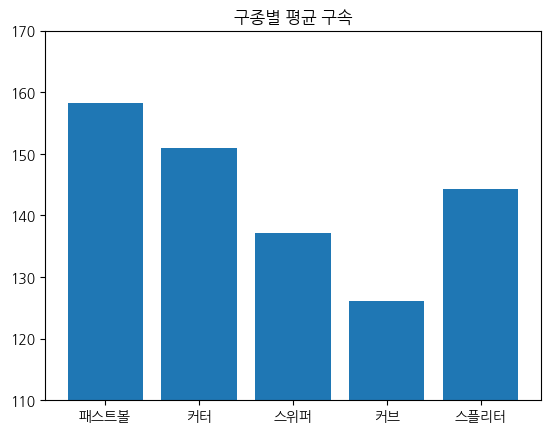

In [36]:
plt.bar(x, y)
plt.title('구종별 평균 구속')

# y축 범위 설정
plt.ylim(110, 170)
plt.show()

### 이닝별 평균 구속 꺾은선

In [37]:
Fastball = df[df['pitch_type'] == 'FF']
Fastball

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,...,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,speed_km
0,0,FF,2025-10-28,96.3,-2.06,5.67,"Ohtani, Shohei",676391,660271,double,hit_into_play,NaN,NaN,NaN,NaN,7,Ernie Clement doubles (4) on a sharp line driv...,W,R,R,LAD,TOR,X,8.0,line_drive,1,0,2025,-0.77,1.36,-0.46,1.94,NaN,NaN,662139.0,0,7,Top,82.01,52.44,...,2,1,2,1,2,1,Standard,Standard,219,-0.114,0.692,NaN,NaN,1.088,-0.692,101.7,-1,1,0.270197,0.729803,30,29,31,29,3,2,11.0,1,4,1.0,1.11,0.77,0.77,36.1,NaN,NaN,NaN,NaN,NaN,155.043
2,2,FF,2025-10-28,97.3,-2.33,5.64,"Ohtani, Shohei",662139,660271,single,hit_into_play,NaN,NaN,NaN,NaN,6,Daulton Varsho singles on a line drive to righ...,W,L,R,LAD,TOR,X,9.0,line_drive,0,0,2025,-0.69,1.24,0.40,2.78,NaN,NaN,NaN,0,7,Top,183.66,122.30,...,2,1,2,1,2,1,Standard,Standard,215,-0.045,0.438,78.4,7.6,0.988,-0.438,88.0,-1,1,0.307793,0.692207,30,28,31,29,3,2,11.0,1,4,1.0,1.18,0.69,-0.69,33.1,9.511846,-3.945714,29.672946,29.827708,25.316385,156.653
4,4,FF,2025-10-28,95.8,-2.18,5.62,"Ohtani, Shohei",672386,660271,NaN,foul,NaN,NaN,NaN,NaN,11,Foul,W,R,R,LAD,TOR,S,NaN,NaN,2,1,2025,-0.32,1.24,-0.04,3.79,NaN,NaN,NaN,2,6,Top,NaN,NaN,...,2,1,2,1,2,1,Standard,Standard,220,-0.009,-0.073,66.9,6.8,NaN,0.073,88.0,-1,1,0.383533,0.616467,30,26,31,27,3,2,11.0,1,4,1.0,1.24,0.32,0.32,31.5,11.110452,2.087570,11.835127,36.633617,30.831513,154.238
6,6,FF,2025-10-28,95.8,-2.18,5.66,"Ohtani, Shohei",672386,660271,NaN,ball,NaN,NaN,NaN,NaN,12,Ball,W,R,R,LAD,TOR,B,NaN,NaN,1,0,2025,-0.33,1.41,0.98,3.03,NaN,NaN,NaN,2,6,Top,NaN,NaN,...,2,1,2,1,2,1,Standard,Standard,212,-0.009,0.065,NaN,NaN,NaN,-0.065,NaN,-1,1,0.383533,0.616467,30,26,31,27,3,2,11.0,1,4,1.0,1.08,0.33,0.33,35.1,NaN,NaN,NaN,NaN,NaN,154.238
9,9,FF,2025-10-28,98.6,-2.37,5.48,"Ohtani, Shohei",680718,660271,NaN,called_strike,NaN,NaN,NaN,NaN,5,Called Strike,W,L,R,LAD,TOR,S,NaN,NaN,0,0,2025,-0.42,1.34,0.20,2.86,NaN,NaN,NaN,1,6,Top,NaN,NaN,...,2,1,2,1,2,1,Strategic,Standard,214,-0.008,-0.039,NaN,NaN,NaN,0.039,NaN,-1,1,0.364967,0.635033,30,25,31,26,3,2,11.0,1,4,1.0,1.01,0.42,-0.42,29.2,NaN,NaN,NaN,NaN,NaN,158.746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,1449,FF,2025-06-16,100.2,-1.82,5.59,"Ohtani, Shohei",650333,660271,NaN,ball,NaN,NaN,NaN,NaN,14,Ball,R,L,R,LAD,SD,B,NaN,NaN,1,2,2025,-0.60,1.24,1.25,1.10,NaN,665487.0,NaN,0,1,Top,NaN,NaN,...,0,0,0,0,0,0,Standard,Standard,215,-0.001,0.045,NaN,NaN,NaN,-0.045,NaN,0,0,0.440805,0.559195,30,28,31,28,1,0,NaN,1,6,1.0,1.03,0.60,-0.60,35.5,NaN,NaN,NaN,NaN,NaN,161.322
1027,1555,FF,2025-06-16,98.6,-1.95,5.59,"Ohtani, Shohei",650333,660271,NaN,swinging_strike,NaN,NaN,NaN,NaN,14,Swinging Strike,R,L,R,LAD,SD,S,NaN,NaN,1,0,2025,-0.45,0.99,1.50,1

In [40]:
x, y = [], []

for i in range(1, 10):
  inning = Fastball[Fastball['inning'] == i]
  x.append(i)
  y.append(inning['speed_km'].mean())

y

[np.float64(158.21470000000002),
 np.float64(158.35477),
 np.float64(158.8725),
 np.float64(158.71325423728817),
 np.float64(157.28752941176472),
 np.float64(158.14935294117652),
 np.float64(156.814),
 nan,
 nan]

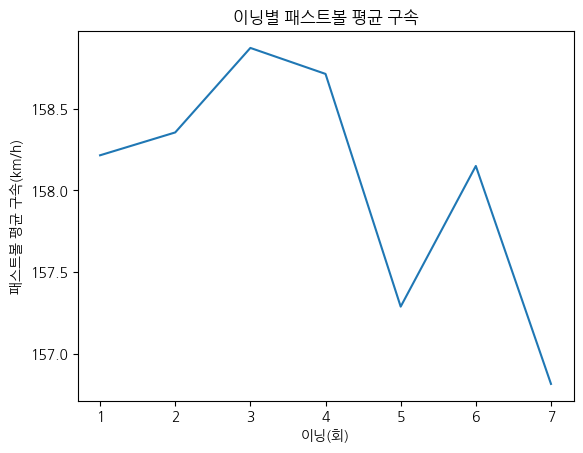

In [43]:
plt.plot(x, y)
plt.title('이닝별 패스트볼 평균 구속')

# x축과 y축에 라벨 추가
plt.xlabel('이닝(회)')
plt.ylabel('패스트볼 평균 구속(km/h)')
plt.show()